# OUR MODEL, the TEST_TRAIN_SPLIT aka PROPER version!!:)



## If in colab

Mount notebook in drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Then allow the notebook to access your google account ie the cloud

In [2]:
from google.colab import auth
auth.authenticate_user()

# Install the required libraries !!

In [3]:
#SAM
!pip install git+https://github.com/facebookresearch/segment-anything.git
#Transformers
!pip install -q git+https://github.com/huggingface/transformers.git
#Datasets to prepare data and monai if you want to use special loss functions
!pip install datasets
!pip install -q monai
!pip install google-cloud-storage

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-zgf_zxtj
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-zgf_zxtj
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36587 sha256=0fac1615c148061c0ea3da6441e45fd4a90da90200bf0b331c1bf024fdcd2423
  Stored in directory: /tmp/pip-ephem-wheel-cache-oxku81j3/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116

# Install packages !!

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from scipy import ndimage
from datasets import Dataset
from PIL import Image
from google.cloud import storage
from io import BytesIO
#import tensorflow as tf

# Load images !!

**Can test that the connection to Google Cloud is working quickly w this cell**

In [5]:
# client = storage.Client()  # Implicit environ set-up
# bucket = client.get_bucket('training_images_solar')
# blob = bucket.blob('original/1.png')
# as_bytes = blob.download_as_bytes()
# im = Image.open(BytesIO(as_bytes))
# as_bytes = blob.download_as_bytes()
# plt.imshow(Image.open(BytesIO(as_bytes)))

In [6]:
client = storage.Client()  # Implicit environ set-up
training_bucket = client.get_bucket('training_images_solar')

def import_data(folder, bucket) -> np.array:
    """
    Import images from specified Google Cloud folder
    Returns a list of arrays
    """

    #get all file names
    file_names = [blob.name for blob in bucket.list_blobs(prefix=folder)]
    #sort file names
    file_names_sorted = sorted(file_names)

    #storing all the np.array images
    folder_images = []

    i = 1
    for file in file_names:
        #import each picture from folder
        blob = bucket.blob(file)
        as_bytes = blob.download_as_bytes()
        im = Image.open(BytesIO(as_bytes))
        #resize w pillow!!
        im = im.resize((256, 256))
        # #append to list as an array
        folder_images.append(np.asarray(im, dtype=np.uint8))

        #just a counter to see how fast it's moving
        print(f"Completed {i} images")
        i+=1

    return folder_images

### Grayscale

In [7]:
%%time

gray = import_data(folder= 'renamed_gray', bucket=training_bucket)

Streaming output truncated to the last 5000 lines.
Completed 2203 images
Completed 2204 images
Completed 2205 images
Completed 2206 images
Completed 2207 images
Completed 2208 images
Completed 2209 images
Completed 2210 images
Completed 2211 images
Completed 2212 images
Completed 2213 images
Completed 2214 images
Completed 2215 images
Completed 2216 images
Completed 2217 images
Completed 2218 images
Completed 2219 images
Completed 2220 images
Completed 2221 images
Completed 2222 images
Completed 2223 images
Completed 2224 images
Completed 2225 images
Completed 2226 images
Completed 2227 images
Completed 2228 images
Completed 2229 images
Completed 2230 images
Completed 2231 images
Completed 2232 images
Completed 2233 images
Completed 2234 images
Completed 2235 images
Completed 2236 images
Completed 2237 images
Completed 2238 images
Completed 2239 images
Completed 2240 images
Completed 2241 images
Completed 2242 images
Completed 2243 images
Completed 2244 images
Completed 2245 images
Com

### Originals

In [8]:
original = import_data(folder= 'original', bucket=training_bucket)

Streaming output truncated to the last 5000 lines.
Completed 2201 images
Completed 2202 images
Completed 2203 images
Completed 2204 images
Completed 2205 images
Completed 2206 images
Completed 2207 images
Completed 2208 images
Completed 2209 images
Completed 2210 images
Completed 2211 images
Completed 2212 images
Completed 2213 images
Completed 2214 images
Completed 2215 images
Completed 2216 images
Completed 2217 images
Completed 2218 images
Completed 2219 images
Completed 2220 images
Completed 2221 images
Completed 2222 images
Completed 2223 images
Completed 2224 images
Completed 2225 images
Completed 2226 images
Completed 2227 images
Completed 2228 images
Completed 2229 images
Completed 2230 images
Completed 2231 images
Completed 2232 images
Completed 2233 images
Completed 2234 images
Completed 2235 images
Completed 2236 images
Completed 2237 images
Completed 2238 images
Completed 2239 images
Completed 2240 images
Completed 2241 images
Completed 2242 images
Completed 2243 images
Com

## Check if they loaded in correctly

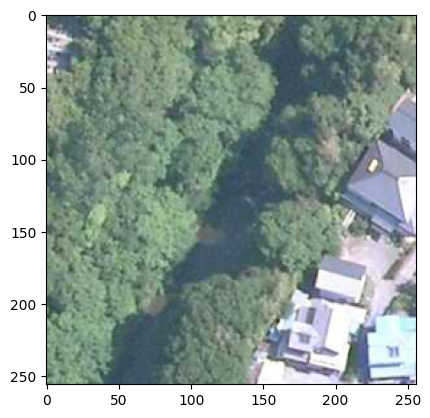

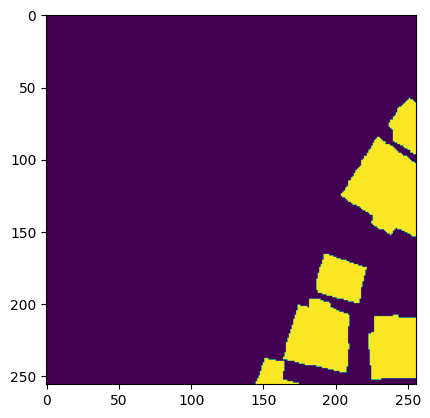

In [9]:
plt.imshow(original[31])
plt.show()
plt.imshow(gray[31])
plt.show()

### Test run, 10 images

In [10]:
# client = storage.Client()  # Implicit environ set-up
# bucket = client.get_bucket('training_images_solar')

# file_names = [blob.name for blob in bucket.list_blobs(prefix='original')]
#     #sort file names
# file_names_sorted = sorted(file_names)

#     #storing all the np.array images
# original = []

# i = 1
# while i < 30:
#   for file in file_names_sorted:
#     #import each picture from folder
#     blob = bucket.blob(file)
#     as_bytes = blob.download_as_bytes()
#     im = Image.open(BytesIO(as_bytes))
#     #resize w pillow!!
#     im = im.resize((256, 256))
#     # #append to list as an array
#     original.append(np.asarray(im, dtype=np.uint8))

#     #just a counter to see how fast it's moving
#     print(f"Completed {i} images")
#   i += 1

In [11]:
# original = test_import_data(folder='original')

In [12]:
# client = storage.Client()  # Implicit environ set-up
# bucket = client.get_bucket('training_images_solar')

# grays = []
# for i in range(1,10):
#     blob = bucket.blob(f'grayscale/{i}mask.png')
#     as_bytes = blob.download_as_bytes()
#     im = Image.open(BytesIO(as_bytes))
#     #resize w pillow!!
#     im = im.resize((256, 256))
#     # #append to list as an array
#     grays.append(np.asarray(im, dtype=np.uint8))

### Testing with a single image

In [13]:
# client = storage.Client()  # Implicit environ set-up
# bucket = client.get_bucket('training_images_solar')

# def import_data(bucket)-> np.array:
#     folder_images = []

#     #import each picture from folder
#     blob = bucket.get_blob('original/1.png')
#     as_bytes = blob.download_as_bytes()
#     im = Image.open(BytesIO(as_bytes))
#     #resize w pillow!!
#     im = im.resize((286, 286))
#     folder_images.append(np.asarray(im, dtype=np.uint8))

#     return print(folder_images)

In [14]:
# %%time

# gray = import_data(bucket)

In [15]:
# plt.imshow(gray[0], interpolation='nearest')
# plt.show()

## Make two large arrays

In [16]:
original_np = np.array(original)
grays_np = np.array(gray)

## Delete empty masks

In [17]:
# Create a list to store the indices of non-empty masks
valid_indices = [i for i, mask in enumerate(gray) if mask.max() != 0]

# Filter the image and mask arrays to keep only the non-empty pairs
filtered_images = original_np[valid_indices]
filtered_masks = grays_np[valid_indices]

print("Image shape:", filtered_images.shape)  # e.g., (num_frames, height, width, num_channels)
print("Mask shape:", filtered_masks.shape)

Image shape: (4058, 256, 256, 3)
Mask shape: (4058, 256, 256)


## TRAIN / TEST SPLIT

In [18]:
train_percent = filtered_images.shape[0] * 0.8
train_percent = np.round(train_percent, 0).astype('int8')

training_split_img = filtered_images[:train_percent, :, :, :]
training_split_mask = filtered_masks[:train_percent, :, :]

test_split_img= filtered_images[train_percent:, :, :, :]
test_split_mask= filtered_masks[train_percent:, :, :]

In [19]:
print(training_split_img.shape)
print(test_split_img.shape)

(3976, 256, 256, 3)
(82, 256, 256, 3)


## Create train and test dataset

In [21]:
from datasets import Dataset

train_dataset_dict = {
    "image": [Image.fromarray(img) for img in training_split_img],
    "label": [Image.fromarray(mask) for mask in training_split_mask],
}

# Create the dataset using the datasets.Dataset class
train_dataset = Dataset.from_dict(train_dataset_dict)

test_dataset_dict = {
    "image": [Image.fromarray(img) for img in test_split_img],
    "label": [Image.fromarray(mask) for mask in test_split_mask],
}

# Create the dataset using the datasets.Dataset class
test_dataset = Dataset.from_dict(test_dataset_dict)

Check the dataset

In [23]:
print(train_dataset)
print(test_dataset)

Dataset({
    features: ['image', 'label'],
    num_rows: 3976
})
Dataset({
    features: ['image', 'label'],
    num_rows: 82
})


## Check that the images are properly loading

In [24]:
img_num = random.randint(0, filtered_images.shape[0]-1)
example_image = training_dataset[img_num]["image"]
example_mask = training_dataset[img_num]["label"]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first image on the left
axes[0].imshow(np.array(example_image), cmap='gray')  # Assuming the first image is grayscale
axes[0].set_title("Image")

# Plot the second image on the right
axes[1].imshow(example_mask, cmap='gray')  # Assuming the second image is grayscale
axes[1].set_title("Mask")

# Hide axis ticks and labels
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Display the images side by side
plt.show()

NameError: name 'training_dataset' is not defined

## Create the bounding boxes

In [25]:
#Get bounding boxes from mask.
def get_bounding_box(ground_truth_map):
  # get bounding box from mask
  y_indices, x_indices = np.where(ground_truth_map > 0)
  x_min, x_max = np.min(x_indices), np.max(x_indices)
  y_min, y_max = np.min(y_indices), np.max(y_indices)
  # add perturbation to bounding box coordinates
  H, W = ground_truth_map.shape
  x_min = max(0, x_min - np.random.randint(0, 20))
  x_max = min(W, x_max + np.random.randint(0, 20))
  y_min = max(0, y_min - np.random.randint(0, 20))
  y_max = min(H, y_max + np.random.randint(0, 20))
  bbox = [x_min, y_min, x_max, y_max]

  return bbox

In [26]:
from torch.utils.data import Dataset

class SAMDataset(Dataset):
  """
  This class is used to create a dataset that serves input images and masks.
  It takes a dataset and a processor as input and overrides the __len__ and __getitem__ methods of the Dataset class.
  """
  def __init__(self, dataset, processor):
    self.dataset = dataset
    self.processor = processor

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    item = self.dataset[idx]
    image = item["image"]
    ground_truth_mask = np.array(item["label"])

    # get bounding box prompt
    prompt = get_bounding_box(ground_truth_mask)

    # prepare image and prompt for the model
    inputs = self.processor(image, input_boxes=[[prompt]], return_tensors="pt")

    # remove batch dimension which the processor adds by default
    inputs = {k:v.squeeze(0) for k,v in inputs.items()}

    # add ground truth segmentation
    inputs["ground_truth_mask"] = ground_truth_mask

    return inputs

## Initialize processor and dataset instances

In [27]:
# Initialize the processor
from transformers import SamProcessor
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

In [28]:
train_dataset = SAMDataset(dataset=train_dataset, processor=processor)

In [29]:
example = train_dataset[0]
for k,v in example.items():
  print(k,v.shape)

pixel_values torch.Size([3, 1024, 1024])
original_sizes torch.Size([2])
reshaped_input_sizes torch.Size([2])
input_boxes torch.Size([1, 4])
ground_truth_mask (256, 256)


In [30]:
# Create a DataLoader instance for the training dataset
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, drop_last=False)

In [31]:
#Make validation set dataloader
testing_dataset = SAMDataset(dataset=test_dataset, processor=processor)
test_dataloader = DataLoader(testing_dataset, batch_size=1, shuffle=True, drop_last=False)

In [32]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  print(k,v.shape)

pixel_values torch.Size([2, 3, 1024, 1024])
original_sizes torch.Size([2, 2])
reshaped_input_sizes torch.Size([2, 2])
input_boxes torch.Size([2, 1, 4])
ground_truth_mask torch.Size([2, 256, 256])


In [33]:
val_batch = next(iter(test_dataloader))

In [34]:
batch["ground_truth_mask"].shape

torch.Size([2, 256, 256])

In [35]:
class EarlyStopper:
    def __init__(self, patience=1, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = float('inf')

    def early_stop(self, validation_loss):
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False

In [36]:
# Load the model
from transformers import SamModel
model = SamModel.from_pretrained("facebook/sam-vit-base")

# make sure we only compute gradients for mask decoder
for name, param in model.named_parameters():
  if name.startswith("vision_encoder") or name.startswith("prompt_encoder"):
    param.requires_grad_(False)

config.json:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/375M [00:00<?, ?B/s]

In [37]:
from torch.optim import Adam
import monai
# Initialize the optimizer and the loss function
optimizer = Adam(model.mask_decoder.parameters(), lr=1e-5, weight_decay=0)
#Try DiceFocalLoss, FocalLoss, DiceCELoss
seg_loss = monai.losses.DiceCELoss(sigmoid=True, squared_pred=True, reduction='mean')

## Let's train!!!!

In [38]:
from tqdm import tqdm
from statistics import mean
import torch
from torch.nn.functional import threshold, normalize

#Set early stop
early_stopper = EarlyStopper(patience=3, min_delta=8)

#Training loop
num_epochs = 12

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

model.train()
for epoch in range(num_epochs):
    train_losses = []
    val_losses = []
    for batch in tqdm(train_dataloader):
        # forward pass
        outputs = model(pixel_values=batch["pixel_values"].to(device),
                      input_boxes=batch["input_boxes"].to(device),
                      multimask_output=False)

        # compute loss
        predicted_masks = outputs.pred_masks.squeeze(1)
        ground_truth_masks = batch["ground_truth_mask"].float().to(device)
        loss = seg_loss(predicted_masks, ground_truth_masks.unsqueeze(1))

        with torch.no_grad():
          val_outputs = model(pixel_values=val_batch["pixel_values"].to(device),
                        input_boxes=val_batch["input_boxes"].to(device),
                        multimask_output=False)

          # compute loss
          val_predicted_masks = val_outputs.pred_masks.squeeze(1)
          val_ground_truth_masks = val_batch["ground_truth_mask"].float().to(device)
          val_loss = seg_loss(val_predicted_masks, val_ground_truth_masks.unsqueeze(1))
          val_losses.append(val_loss.item())

        # backward pass (compute gradients of parameters w.r.t. loss)
        optimizer.zero_grad()
        loss.backward()

        # optimize
        optimizer.step()
        train_losses.append(loss.item())

        if early_stopper.early_stop(val_losses[-1]):
          break

    print(f'EPOCH: {epoch+1}')
    print(f'Mean loss: {mean(train_losses)}')
    print(f'Mean val loss: {mean(val_losses)}')

100%|██████████| 1988/1988 [45:16<00:00,  1.37s/it]


EPOCH: 1
Mean loss: 0.4619240041632932
Mean val loss: 0.6503450453161473


100%|██████████| 1988/1988 [45:21<00:00,  1.37s/it]


EPOCH: 2
Mean loss: 0.3954110962987111
Mean val loss: 0.6143755047044284


100%|██████████| 1988/1988 [45:18<00:00,  1.37s/it]


EPOCH: 3
Mean loss: 0.37109604869712465
Mean val loss: 0.6059927650290715


100%|██████████| 1988/1988 [45:18<00:00,  1.37s/it]


EPOCH: 4
Mean loss: 0.35634928880731614
Mean val loss: 0.5376147255751209


100%|██████████| 1988/1988 [45:15<00:00,  1.37s/it]


EPOCH: 5
Mean loss: 0.34396414371428474
Mean val loss: 0.5157522501899923


100%|██████████| 1988/1988 [45:14<00:00,  1.37s/it]


EPOCH: 6
Mean loss: 0.33311700758709756
Mean val loss: 0.4920899872208985


100%|██████████| 1988/1988 [45:20<00:00,  1.37s/it]


EPOCH: 7
Mean loss: 0.32340691146914896
Mean val loss: 0.49280729907859017


100%|██████████| 1988/1988 [45:16<00:00,  1.37s/it]


EPOCH: 8
Mean loss: 0.3150590645389208
Mean val loss: 0.48563990085357633


100%|██████████| 1988/1988 [45:21<00:00,  1.37s/it]


EPOCH: 9
Mean loss: 0.3066672508162587
Mean val loss: 0.47328877470023195


100%|██████████| 1988/1988 [45:19<00:00,  1.37s/it]


EPOCH: 10
Mean loss: 0.2998616556267833
Mean val loss: 0.4580845723239709


100%|██████████| 1988/1988 [45:22<00:00,  1.37s/it]


EPOCH: 11
Mean loss: 0.29182078589364824
Mean val loss: 0.44387274970051266


100%|██████████| 1988/1988 [45:21<00:00,  1.37s/it]

EPOCH: 12
Mean loss: 0.2867237335029742
Mean val loss: 0.4513916626602591


In [39]:
# Save the model's state dictionary to a file
torch.save(model.state_dict(), "/content/drive/MyDrive/Colab_Notebooks/final_project/model_checkpoint/train_test_split.pth")

In [54]:
len(val_losses)

1988

In [ ]:
per_epoch = np.floor(len(train_losses) / 12).astype('int')
one

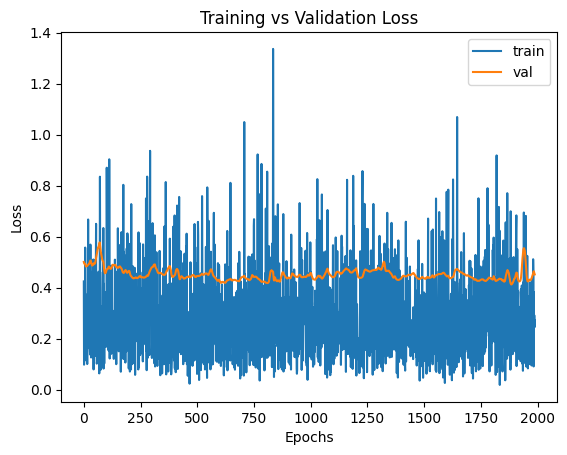

In [40]:
plt.plot(train_losses, label = "train")
plt.plot(val_losses, label = "val")
plt.legend()
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## It's prediction time

In [ ]:
from transformers import SamModel, SamConfig, SamProcessor
import torch

In [ ]:
# Load the model configuration
model_config = SamConfig.from_pretrained("facebook/sam-vit-base")
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

# Create an instance of the model architecture with the loaded configuration
solar_model = SamModel(config=model_config)
#Update the model by loading the weights from saved file.
solar_model.load_state_dict(torch.load("/content/drive/MyDrive/Colab_Notebooks/final_project/model_checkpoint/fully_trained.pth"))

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
solar_model.to(device)

## Testing, data leakage version

In [ ]:
import numpy as np
# import random
import torch
import matplotlib.pyplot as plt

# let's take a random training example
idx = random.randint(0, filtered_images.shape[0]-1)

# load image
test_image = dataset[idx]["image"]

# get box prompt based on ground truth segmentation map
ground_truth_mask = np.array(dataset[idx]["label"])
prompt = get_bounding_box(ground_truth_mask)

# prepare image + box prompt for the model
inputs = processor(test_image, input_boxes=[[prompt]], return_tensors="pt")

# Move the input tensor to the GPU if it's not already there
inputs = {k: v.to(device) for k, v in inputs.items()}

solar_model.eval()

# forward pass
with torch.no_grad():
    outputs = solar_model(**inputs, multimask_output=False)

# apply sigmoid
medsam_seg_prob = torch.sigmoid(outputs.pred_masks.squeeze(1))
# convert soft mask to hard mask
medsam_seg_prob = medsam_seg_prob.cpu().numpy().squeeze()
medsam_seg = (medsam_seg_prob > 0.5).astype(np.uint8)


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first image on the left
axes[0].imshow(np.array(test_image), cmap='gray')  # Assuming the first image is grayscale
axes[0].set_title("Image")

# Plot the second image on the right
axes[1].imshow(medsam_seg, cmap='gray')  # Assuming the second image is grayscale
axes[1].set_title("Mask")

# Plot the second image on the right
axes[2].imshow(medsam_seg_prob)  # Assuming the second image is grayscale
axes[2].set_title("Probability Map")

# Hide axis ticks and labels
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Display the images side by side
plt.show()

## On a Google maps image